# Inaugural Project

In [95]:
# import packages
import warnings
import numpy as np
import matplotlib.pyplot as plt  

# hide runtime warnings
warnings.filterwarnings("ignore")

# import own code
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

#### **Method:**

<font size="4"> The model is solved using the ```HouseholdSpecializationModelClass``` in the following way:
- Create an instance of the class with baseline parameters, $\alpha=0.5$ and $\sigma=1.0$.
- Use ```calc_utility()``` to calculate all the possible utilities, $U$, arising from differents levels of $H_M, H_F, L_M, L_F$.
- Use ```solve_discrete()``` to maximize utility by finding the optimal $H_M, H_F, L_M, L_F$.
- Do this for different values of $\alpha$ and $\sigma$.
</font> 

#### Create instance of the model class:

In [70]:
model = HouseholdSpecializationModelClass()

#### Setup:

In [71]:
# create lists of parameters
sigmas = [0.5, 1.0, 1.5]
alphas = [0.25, 0.5, 0.75]

#### Run model for different values of $\sigma$:

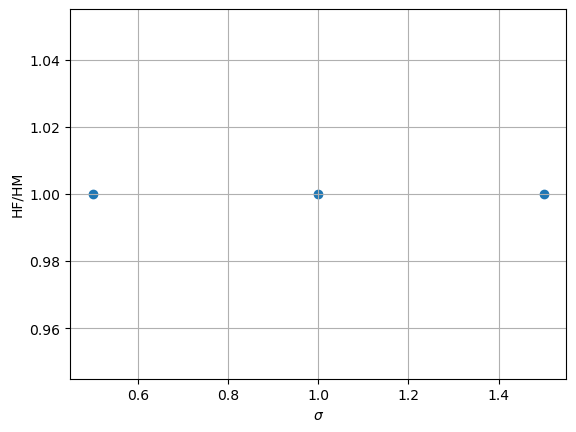

In [73]:
# reset to baseline parameters
model.__init__()

# solve the model for different sigmas
model.solve_multi_par('sigma',sigmas,expand=False,discrete=True)

# plot the solutions for different sigmas
model.plot_multi_par(sigmas,x_lab=r'$\sigma$',y_lab=r'HF/HM')

#### Run model for different values of $\alpha$:

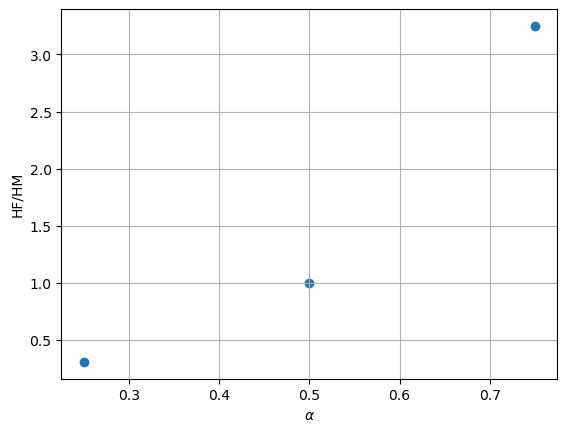

In [75]:
# reset to baseline parameters
model.__init__()

# solve the model for different alphas
model.solve_multi_par('alpha',alphas,expand=False,discrete=True)

# plot the solutions for different alphas
model.plot_multi_par(alphas,x_lab=r'$\alpha$',y_lab=r'HF/HM')

#### **Economic intepretation:**

#### It is evident that the house work ratio, $H_F/H_M$, does not change with the elasticity of substitution, $\sigma$. Each sex works the same amount, though a high elasticity of substitution, $\sigma$, allows them to change their relative workload and keep the same house production. This is because there is no incentive to do so. I.e. each sex is equally productive as $\alpha = 0.5$, and their wages, $w_F$ and $w_M$, are equivalent. However, if we change $\alpha = 0.25$, the house work ratio decreases as the elasticity of subsitution increases:

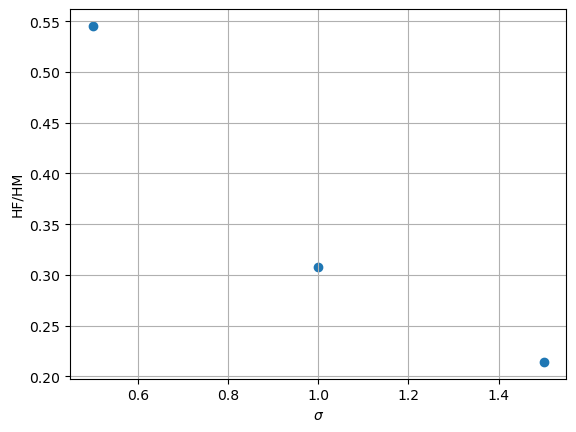

In [76]:
# reset to baseline parameters
model.__init__()

# set alpha to 0.25
setattr(model.par,'alpha',0.25)

# solve the model for different alphas
model.solve_multi_par('sigma',sigmas,expand=False,discrete=True)

# plot the solutions for different alphas
model.plot_multi_par(sigmas,x_lab=r'$\sigma$',y_lab=r'HF/HM')

# Question 2

#### Setup:

In [77]:
# list of wages
wages = [0.8,0.9,1.0,1.1,1.2]

# list of x values for plot
log_wages = [np.log(x/model.par.wM) for x in wages]

#### Run model for different values of $w_F$:

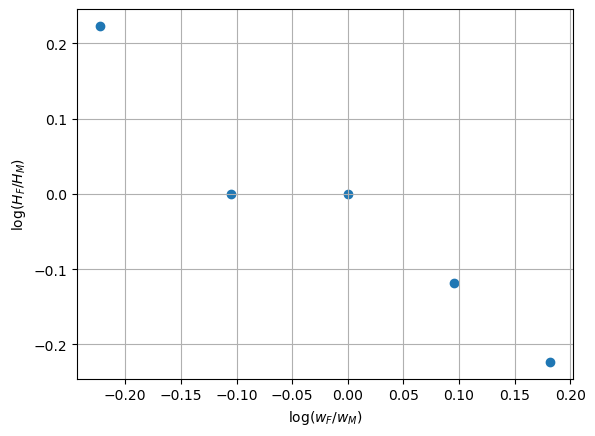

In [78]:
# reset to baseline parameters
model.__init__()

# solve the model for different wages
model.solve_multi_par('wF',wages,expand=False,discrete=True)

# plot the solutions for different wages
model.plot_multi_par(log_wages,
                     y_function=lambda y: np.log(y),
                     x_lab=r'$\log(w_F/w_M)$',
                     y_lab=r'$\log(H_F/H_M)$')

#### **Economic intepretation:**

#### The plot above indicates a negative correlation between the house work ratio, $H_F/H_M$, and the wage ratio, $w_F/w_M$. In other words, when the female wage increases, she tends to do less house work relative to her husband. The elasticity of substitution, $\sigma=1$ in the Cobb-Douglas case, keeps them from completely reallocating such that the female worker does all the market work, while the male worker does all the house work. If $\sigma$ was higher, it would be easier for the couple to reallocate their time. The plot below illustrates this; as $\sigma = 2.0$ it makes the house work ratio, $H_F/H_M$, decrease even more as $w_F$ increases.

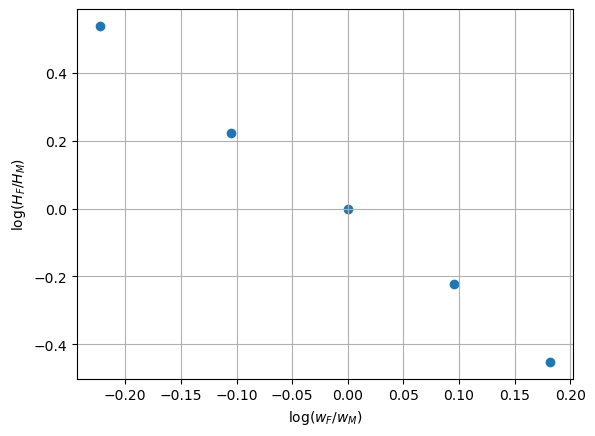

In [80]:
# reset to baseline parameters
model.__init__()

# set sigma to 2.0
setattr(model.par,'sigma',2.0)

# solve the model for different wages
model.solve_multi_par('wF',wages,expand=False,discrete=True)

# plot the solutions for different wages
model.plot_multi_par(log_wages,
                     y_function=lambda y: np.log(y),
                     x_lab=r'$\log(w_F/w_M)$',
                     y_lab=r'$\log(H_F/H_M)$')

# Question 3

#### Now, the model is solved for different wages, $w_F$, but with a continuous choice set by using a numerical optimizer. I use ```scipy.optimze.minimize``` with the BFGS method. This optimizer finds the global minimum. However, the utility and production functions in this problem are strictly concave, so we don't really need to worry about local minima.

#### The plot with the continuous choice set is more smooth than the plot with the discrete choice set. We avoid kinks because of a broader range of possible choices.

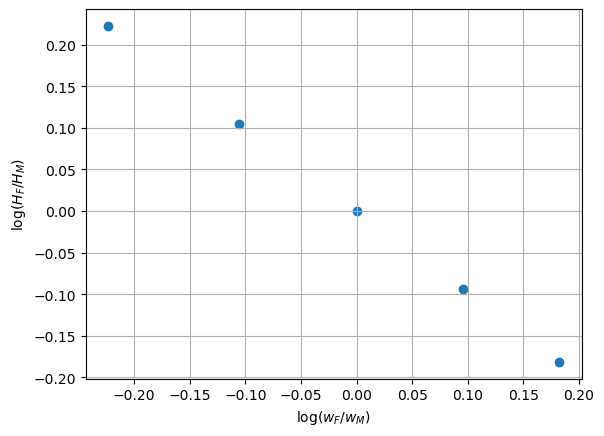

In [82]:
# reset to baseline parameters
model.__init__()

# solve the model for different wages
model.solve_multi_par('wF',wages,expand=False,discrete=False)

# plot the solutions for different wages
model.plot_multi_par(log_wages,
                     y_function=lambda y: np.log(y),
                     x_lab=r'$\log(w_F/w_M)$',
                     y_lab=r'$\log(H_F/H_M)$')

# Question 4

#### The model parameters, $\alpha$ and $\sigma$, are estimated by minimizing the squared deviation from the assumed true $\beta_0 = 0.4$ and $\beta_1 = -0.1$. That is

#### $\min_{\alpha, \sigma} \hspace{0.2cm} (\beta_0 - \hat{\beta}_0)^2 +(\beta_1 - \hat{\beta}_1)^2$.

<font size="4"> This is done using an numerical optimizer to find the global minimium. The process is:
- Guess on parameters, $\alpha$ and $\sigma$.
- Solve the model continouosly for each $w_F$.
- Calculate resulting $\log(H_F/H_M)$ and $\log(w_F/w_M)$.
- Run regression and get the estimated $\hat{\beta}_0$ and $\hat{\beta}_1$.
- Make new guess on $\alpha$ and $\sigma$ or end if converged.

Note that the estimation is done with bounds $\alpha \in [0,1]$ and $\sigma \in [0,1]$.
<font>

In [92]:
# set baseline parameters
model.__init__()

# estimate model
est = model.estimate(expand=False)

#### Get estimates (```x[0]``` $= \sigma$ and ```x[1]``` $= \alpha$):

In [93]:
print(est.x) # sigma, alpha
print(est.fun) # squared deviation

[0.30052094 0.69424163]
0.0


#### **Estimation results:** Low $\sigma=0.30$ and high $\alpha=0.69$.

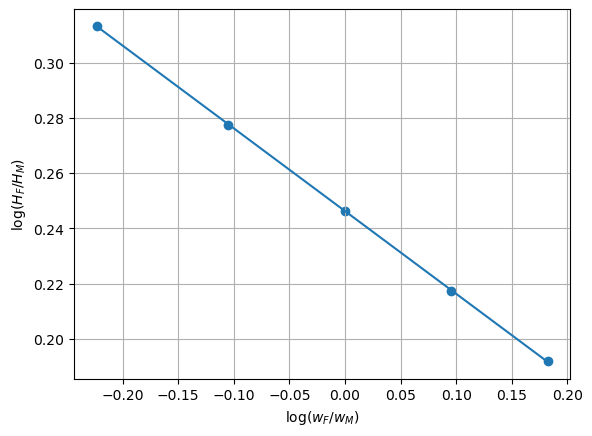

In [94]:
# plot
model.plot_multi_par(log_wages,
                     y_function=lambda y: np.log(y),
                     x_lab=r'$\log(w_F/w_M)$',
                     y_lab=r'$\log(H_F/H_M)$',
                     show_reg=True)

#### **Economic interpretation:**

#### The estimated $\beta_1$ by Siminski and Yetsenga (2002) suggests that the house work ratio, $H_F/H_M$, decreases by 0,1 pct. when the wage ratio, $w_F/w_M$, increases by 1 pct. One could argue that this is a relatively weak relationship compared to what one would expect. Intuitively, one would expect the female worker to do much less house work, $H_F$, if her wage increased relative to the male wage.<b>

#### To account for this weak correlation, $\beta_1=-0.1$, the model estimation perfomed above results in a high $\alpha$ and a low $\sigma$. That is, the only way the present model can explain the weak correlation is if the female worker is far more productive at home, high $\alpha$, and the couple cannot easily substitute house work between them, low $\sigma$. 

#### In other words, when the female wage, $w_F$ increases relative to the male wage, $w_M$, the couple cannot afford to reallocate their time such that the female partner does less house work, $H_F \downarrow$, beacuse 1) the female partner is far more productive at house work than the male partner (high $\alpha$), and 2) both partners much contribute a lot to achieve high $H$ (low $\sigma$ - almost corresponds to $H_F$ and $H_M$ being perfect complements).

# Question 5

#### **Model expansion:**

#### If both sexes are equally productive at home, $\alpha = 0.5$, then an alternative explaination for the weak correlation between $H_F/H_M$ and $w_F/w_M$ could be that the female partner gets more utility from house work or that the male partner gets more disutility from housework. Consider the model with $\epsilon_M$ and $\epsilon_F$ allowing for different disutility from housework for each sex:

\begin{align*}
\text{Utility} &= \frac{Q^{1-\rho}}{1-\rho} - v \left( \text{Disutility}_M + \text{Disutility}_F \right) \\
\text{Disutility}_M &= \frac{H_M^{1+1/\epsilon_M}}{1+1/\epsilon_M} + \frac{L_M^{1+1/\epsilon}}{1+1/\epsilon} \\

\text{Disutility}_F &= \frac{H_F^{1+1/\epsilon_F}}{1+1/\epsilon_F} + \frac{L_F^{1+1/\epsilon}}{1+1/\epsilon}
\end{align*}

#### As the marginal disutility is increasing for descreasing $\epsilon$, we can set $\epsilon_M = 0.55$ and $\epsilon_F = 1.00$ such that the male partner gets more marginal disutility from housework relative to the female partner. The disutility from market labor, $L_M$ and $L_F$, is kept equivalent for both sexes with $\epsilon = 1.0$.



In [86]:
# reset baseline
model.__init__()

# set epsilonM and epsilonF
model.par.epsilonM = 0.55
model.par.epsilonF = 1.0

# estimate model - expand = True estimates the expanded model
est_new = model.estimate(expand=True)

#### Get estimates (```x[0]``` $= \sigma$ and ```x[1]``` $= \alpha$):

In [87]:
print(est_new.x) # sigma, alpha
print(est_new.fun) # squared deviation

[0.55322335 0.52569214]
0.006844381579290428


#### **Estimation results:** Now, $\alpha$ is approximately equal to 0.5 reflecting that each sex is equally productive at housework. In the expanded model, the weak correlation between $H_F/H_M$ and $w_F/w_M$ could be explained by the idea that the male partner gets more disutility from housework.